In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

## Regressão Logística

In [2]:
# Importando base de dados
base = pd.read_csv('../Dados/Eleicao.csv', sep =';')
base.head()

,CANDIDATO,SITUACAO,DESPESAS
0,George Turner,0,10
1,Victor Johnson,0,100
2,Jerry Perry,1,1600
3,Shirley Cook,1,1500
4,Carolyn Bailey,1,3300


In [3]:
# Visualizando dados da base
base.describe()

,SITUACAO,DESPESAS
count,47.000000,47.000000
mean,0.510638,1085.744681
std,0.505291,870.968338
min,0.000000,10.000000
25%,0.000000,300.000000
50%,1.000000,800.000000
75%,1.000000,1700.000000
max,1.000000,3300.000000


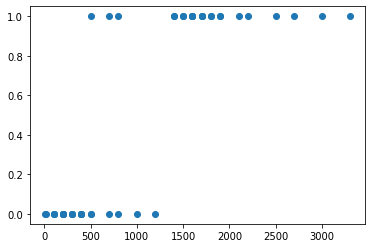

In [5]:
# Plotando gráfico comparativo
plt.scatter(base.DESPESAS, base.SITUACAO)

In [4]:
# Calculando a correlação
correlacao = np.corrcoef(base.DESPESAS, base.SITUACAO)
correlacao

array([[1.        , 0.81218717],
       [0.81218717, 1.        ]])

In [5]:
# Dividindo base entre treino e teste
X = base.iloc[:, 2].values
X = X[:, np.newaxis]
y = base.iloc[:, 1].values

In [6]:
# Criando modelo de treinamento e teste
modelo = LogisticRegression()
modelo.fit(X, y)

# Verificando valores de interceptação, inclinação
print(modelo.coef_)
print(modelo.intercept_)

[[0.00498364]]
[-4.60287217]


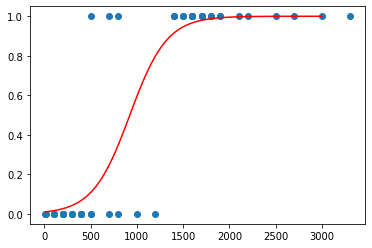

In [7]:
# Plotando gráfico de previsão com sigmóide usando dados aleatórios
plt.scatter(X, y)
teste = np.linspace(10, 3000, 100)

def model(x):
    return 1 / (1 + np.exp(-x))

r = model(teste * modelo.coef_ + modelo.intercept_).ravel()
plt.plot(teste, r, color = 'red')

In [8]:
# Importando base de dados para teste
previsoes = pd.read_csv('../Dados/NovosCandidatos.csv', sep =';')

# Criando estrutura de dados para teste
despesas = previsoes.iloc[:, 1].values
despesas = despesas.reshape(-1, 1)

# Testando modelo
prev_test = modelo.predict(despesas)

# Adicionando valores previsores a base previsoes
previsoes = np.column_stack((previsoes, prev_test))

In [11]:
previsoes

array([['A', 0, 0],
       ['B', 10, 0],
       ['C', 200, 0],
       ['D', 500, 0],
       ['E', 900, 0],
       ['F', 1500, 1],
       ['G', 3000, 1]], dtype=object)